In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

sns.set()

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169


In [5]:
data.isnull().sum()

labels    0
f_0       0
f_1       0
f_2       0
f_3       0
         ..
f_1195    0
f_1196    0
f_1197    0
f_1198    0
f_1199    0
Length: 1201, dtype: int64

In [6]:
data.shape

(5250, 1201)

In [7]:
dep = data["labels"]
indep = data.drop(columns=["labels"])

In [8]:
test_data = pd.read_csv("test.csv")
test_data.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000


In [9]:
test_indep = test_data.drop(columns = ['id'])
test_indep

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [10]:
final_df = pd.DataFrame()
final_df = test_data[["id"]]
final_df

,id
0,1
1,2
2,3
3,4
4,5
...,...
2245,2246
2246,2247
2247,2248
2248,2249


In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.998:                 
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True 

In [12]:
callbacks = myCallback()

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)


model.compile(optimizer=tf.keras.optimizers.Adam(), 
loss= "binary_crossentropy", 
metrics=['accuracy'])


In [13]:
history = model.fit(indep, dep, epochs=50) #callbacks=[callbacks])

Epoch 1/50
165/165 [==============================] - 2s 2ms/step - loss: 0.3479 - accuracy: 0.8314
Epoch 2/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9842
Epoch 3/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9990
Epoch 4/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 5/50
165/165 [==============================] - 0s 2ms/step - loss: 8.6792e-04 - accuracy: 1.0000
Epoch 6/50
165/165 [==============================] - 0s 3ms/step - loss: 4.9957e-04 - accuracy: 1.0000
Epoch 7/50
165/165 [==============================] - 0s 2ms/step - loss: 3.2858e-04 - accuracy: 1.0000
Epoch 8/50
165/165 [==============================] - 0s 2ms/step - loss: 2.3200e-04 - accuracy: 1.0000
Epoch 9/50
165/165 [==============================] - 0s 2ms/step - loss: 1.7159e-04 - accuracy: 1.0000
Epoch 10/50
165/165 [==============================] - 0s 3ms/step - loss: 1.310

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               307456    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 340,481
Trainable params: 340,481
Non-trainable params: 0
_________________________________________________________________


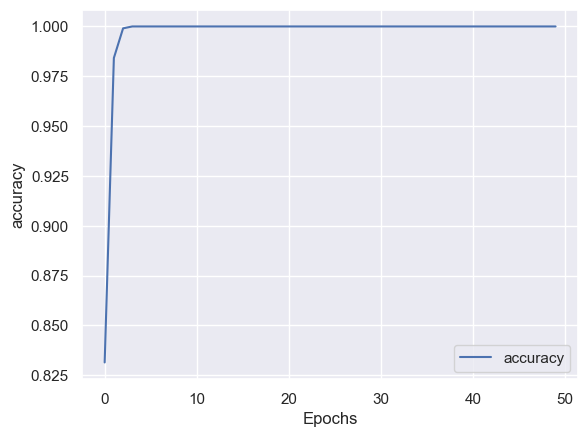

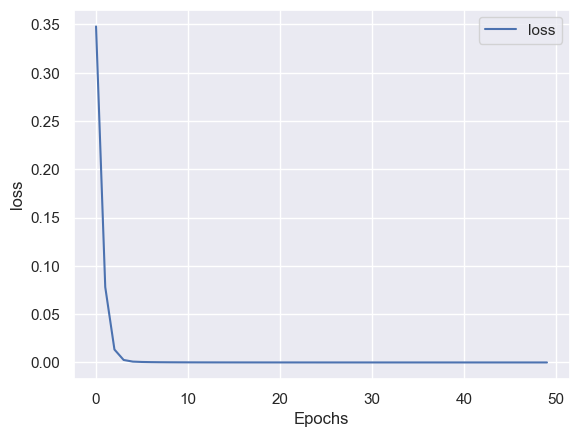

In [15]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
model_predictions = model.predict(test_indep)

lis = []

for x in model_predictions:
    if x > 0.5:
        lis.append(1)
    else:
        lis.append(0)
lis

71/71 [==============================] - 0s 1ms/step


[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [17]:
my_series = pd.Series(lis)
final_df["labels"] = lis

final_df

C:\Users\haris\AppData\Local\Temp\ipykernel_2660\959362348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["labels"] = lis


,id,labels
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [22]:
final_df.to_csv("Final_Output.csv", index = False)

# DECISION TREE

In [23]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [24]:
drugTree.fit(indep, dep)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [25]:
predTree = drugTree.predict(test_indep)

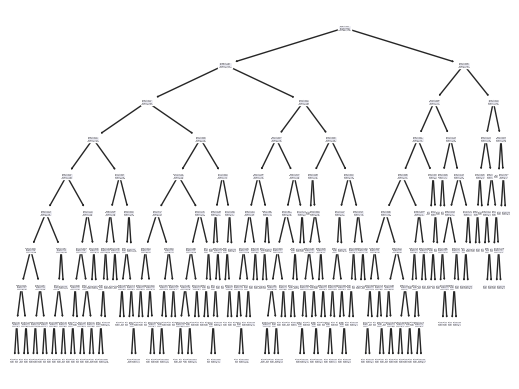

In [26]:
tree.plot_tree(drugTree)
plt.show()

In [27]:
my_series = pd.Series(predTree)
final_df["labels"] = predTree

final_df

C:\Users\haris\AppData\Local\Temp\ipykernel_18112\3614248246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["labels"] = predTree


,id,labels
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [28]:
final_df.to_csv("Final_Output_Decision Tree.csv", index = False)

# XGBOOST ALGO

In [29]:
import xgboost as xgb

In [31]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=8,
    learning_rate=0.1,
    n_estimators=100
)

# Train the XGBoost model
model.fit(indep, dep)

# Make predictions on the test set
y_pred = model.predict(test_indep)

In [32]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [33]:
my_series = pd.Series(y_pred)
final_df["labels"] = y_pred

final_df

C:\Users\haris\AppData\Local\Temp\ipykernel_18112\2965317023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["labels"] = y_pred


,id,labels
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [34]:
final_df.to_csv("Final_Output_XGBOOST.csv", index = False)

# LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(indep,dep)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [36]:
yhat = LR.predict(test_indep)
yhat

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [37]:
yhat_prob = LR.predict_proba(test_indep)
yhat_prob

array([[6.62993695e-01, 3.37006305e-01],
       [6.58749131e-01, 3.41250869e-01],
       [5.83685935e-01, 4.16314065e-01],
       ...,
       [3.77574312e-02, 9.62242569e-01],
       [9.99959692e-01, 4.03077015e-05],
       [1.67639526e-01, 8.32360474e-01]])

In [38]:
my_series = pd.Series(yhat)
final_df["labels"] = yhat

final_df

C:\Users\haris\AppData\Local\Temp\ipykernel_18112\2878433479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["labels"] = yhat


,id,labels
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [39]:
final_df.to_csv("Final_Output_LogiReg.csv", index = False)

In [ ]:
print("More models yet to come")

In [ ]:
print()
print()